<a href="https://colab.research.google.com/github/LolFolUp/AI/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.**ИМПОРТ ДАННЫХ**



**Найти в таблице (из исходных данных) название своего датасета**(Admission_Predict)

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
data = pd.read_csv('Admission_Predict (1).csv') #1:00:38 показывается эта функция



Saving Admission_Predict.csv to Admission_Predict (3).csv
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [ ]:
print(data.columns) # смотрим колонки
print(data.head()) # смотрим первые 5 строк нашего датафрейма

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


2.Описать кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -
 до
) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])

Также этот код для 8 задания


От нас хотят предугадать вероятность поступления студента в университет на основе достижений. Включая:

1.   GRE Score — Балл студента на экзамене GRE
2.   TOEFL Score — Балл студента на экзамене TOEFL.
3.   University Rating — Рейтинг университета, куда подает заявку студент (дискретная переменная -1 не может быть).
4.   SOP — Оценка заявления о цели обучения (дискретная от 0 до 5)
5.   LOR — Оценка рекомендательного письма (дискретная от 0 до 5)
6.   CGPA — Средний балл успеваемости студента(дискретная от 0 до 10)
7.   Research — Индикатор наличия исследовательского опыта(дискретная 0 нет, 1 есть)
8.   Chance of Admit — Вероятность поступления(целевая от 0 до 1)



Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.

1 вариант(как делали в методах статистического анализа)

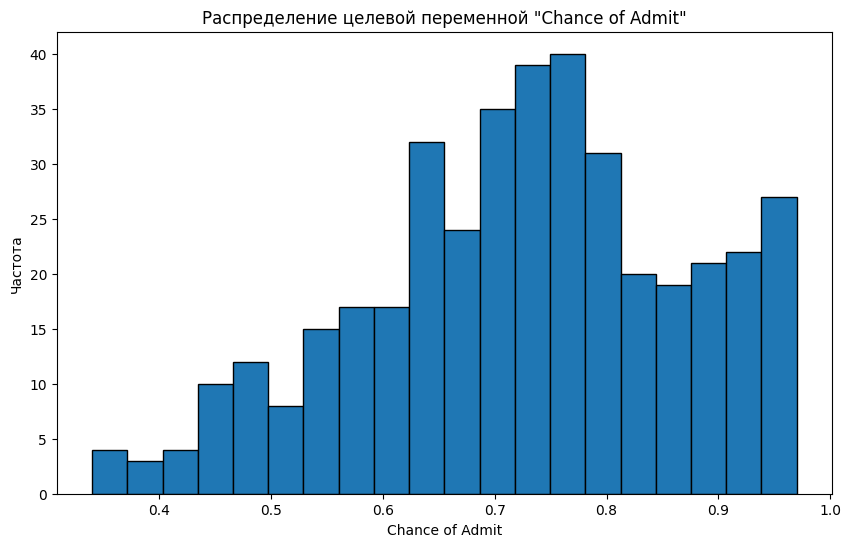

60

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['Chance of Admit '], bins=20, edgecolor='black')
plt.title('Распределение целевой переменной "Chance of Admit"')
plt.xlabel('Chance of Admit')
plt.ylabel('Частота')
plt.show()

# Посчитаем количество уникальных значений целевой переменной
unique_values_count = data['Chance of Admit '].nunique()
unique_values_count

2 вариант:(как показали на лекции)(1:19:49)

<Axes: >

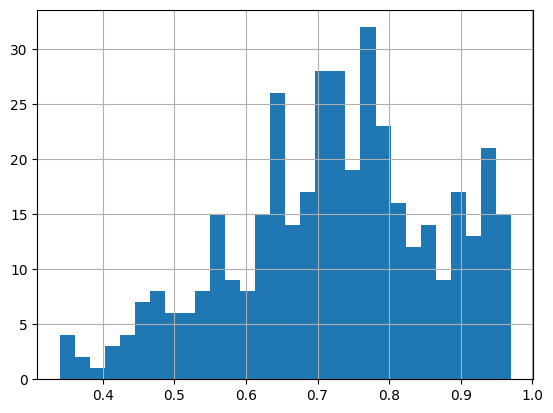

In [ ]:
data['Chance of Admit '].hist(bins=30)

4 Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается одним методом (вы его знаете).


Вывод:(38:59 минуте рассказывается в записи этот метод)

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


5 Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается одним методом (вы его знаете).

Вывод:(1:18:04 в записи)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Пропусков нет, данные полные

7 Постройте гистограммы 5 любых признаков (из множества X, или как оно изначально у нас называется data.data). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.

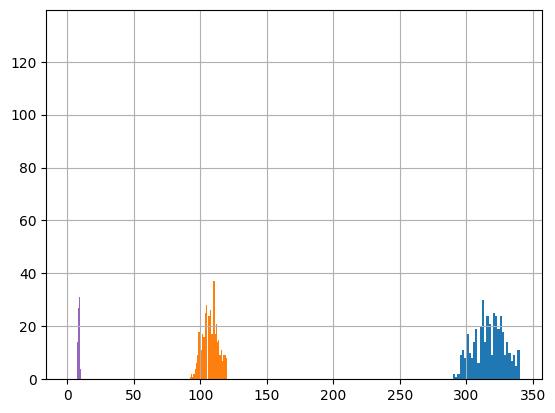

In [ ]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA']
for i in features:
  data[i].hist(bins=30)

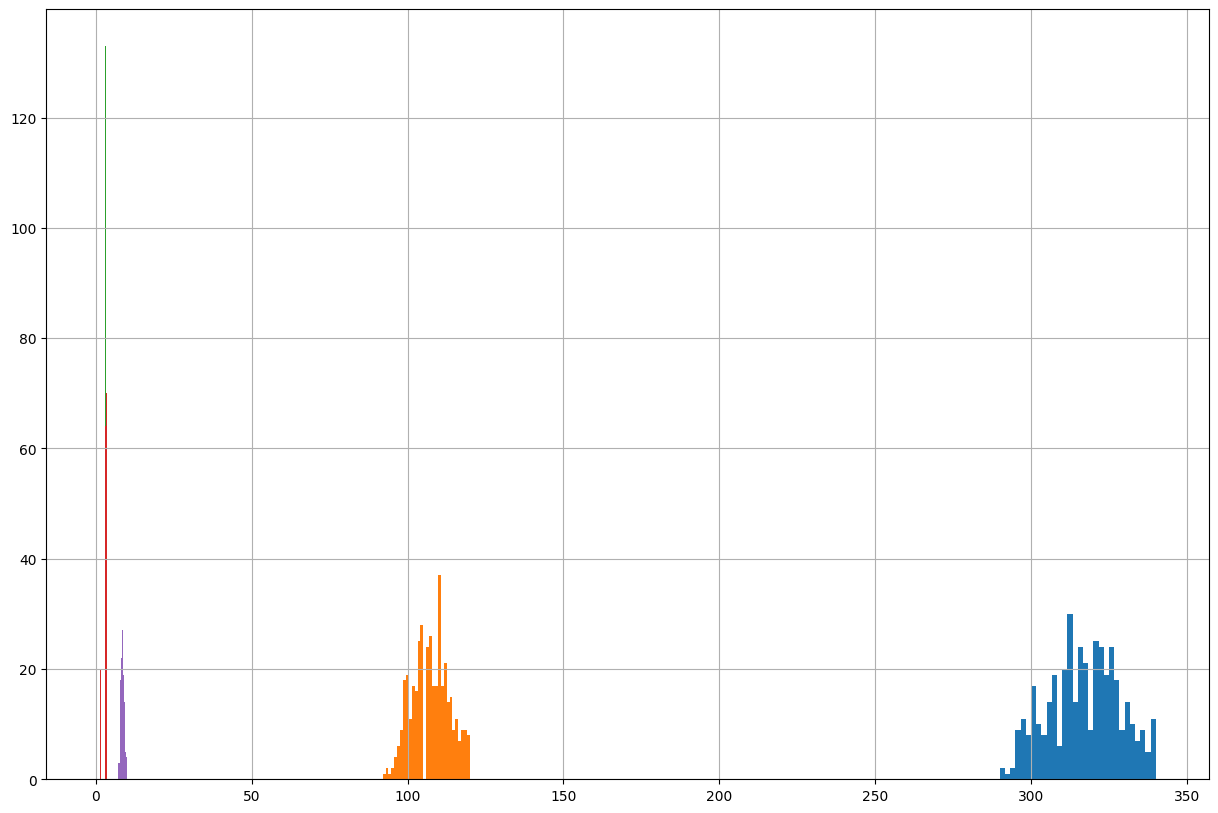

In [ ]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA']
plt.figure(figsize=(15, 10))
for i in features:
  data[i].hist(bins=30)

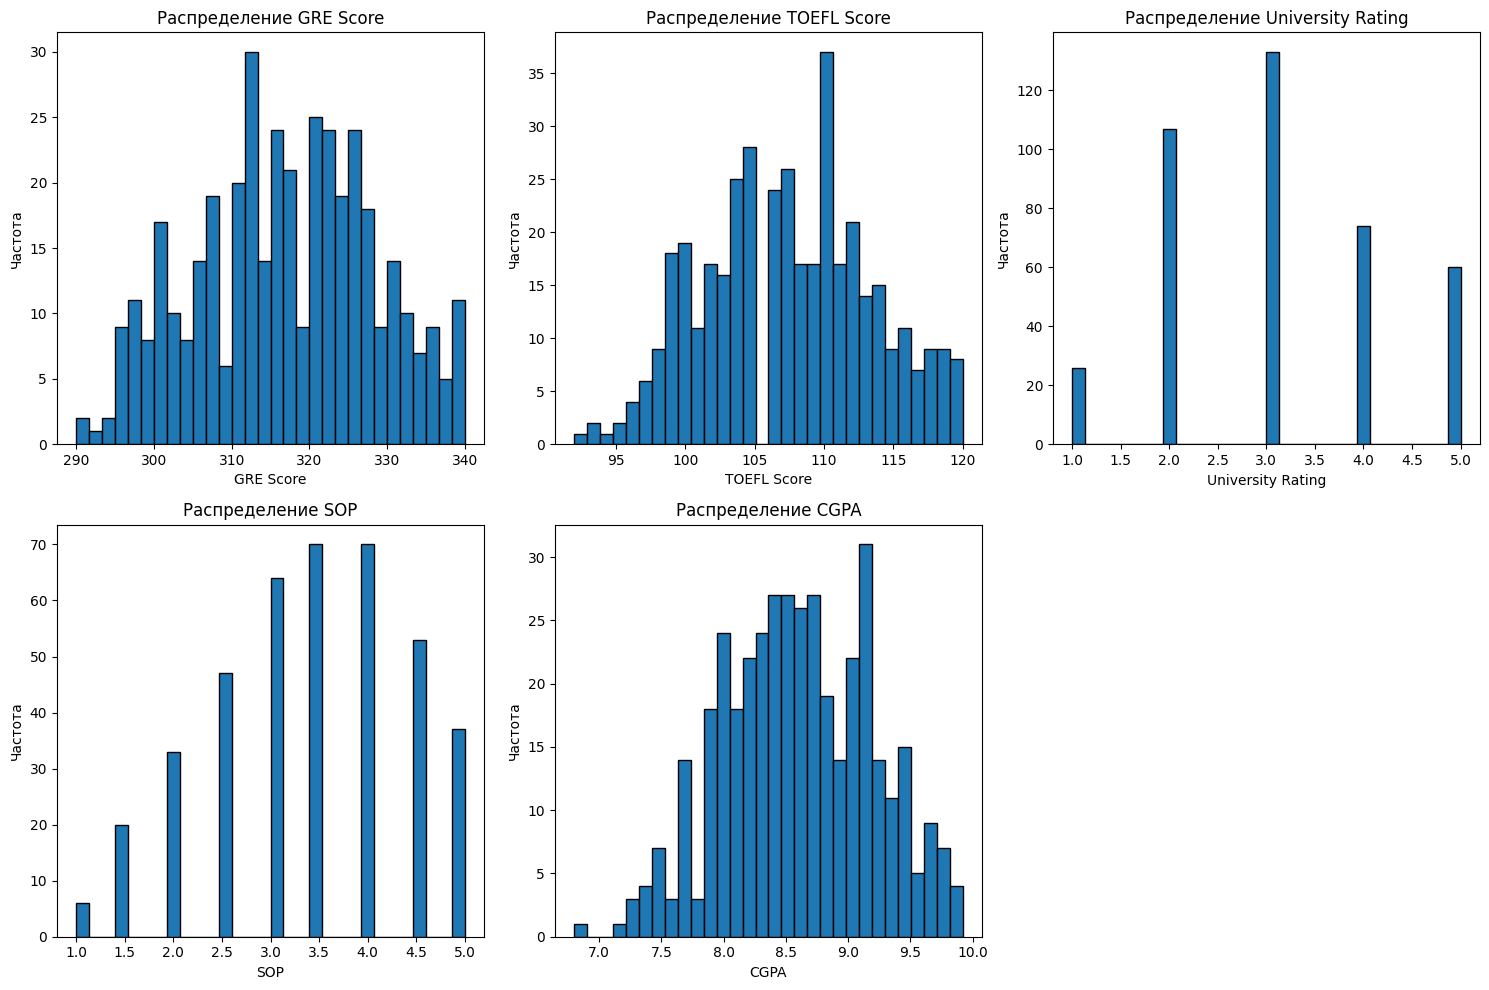

In [ ]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA']

plt.figure(figsize=(15, 10))
#Создаем новую фигуру (холст) размером 15 на 10 дюймов. Этот холст будет использоваться для размещения всех гистограмм, чтобы они не накладывались друг на друга и были достаточно крупными.
# Построение гистограмм для каждого признака
for i, feature in enumerate(features, 1):
    #i — это индекс элемента (начинается с 1, потому что указали enumerate(features, 1)).
    #feature — это текущее название столбца из списка features.
    plt.subplot(2, 3, i)  # создание сетки 2x3
    #Создаем подграфик (подобласть) для размещения каждой гистограммы. plt.subplot(2, 3, i) создает сетку из 2 строк и 3 столбцов. Параметр i указывает номер подграфика(это делает график не мелким
    #как прошлые)
    plt.hist(data[feature], bins=30, edgecolor='black')
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()